In [2]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

### Red_he-ne_laser
### Red Laser wavelength (expanding)
#### $$λ_{red\_expanding} = \frac{2 \Delta D}{fn}$$
#### $$ \Delta D = \frac{fλ}{2} n $$

In [3]:
f = 20
data = pd.DataFrame()
data['n'] = np.arange(0,161,10)
data['D (mm)'] = [25.17, 25.10, 25.04, 24.96, 24.89, 24.82,
             24.75, 24.69, 24.62, 24.55,
             24.48, 24.42, 24.35, 24.28, 24.20,
             24.11, 23.99]
data['ΔD (mm)'] = data.loc[0,'D (mm)'] - data['D (mm)']

data.to_csv('red_expanding_he-ne_laser.csv', index = False)
data

,n,D (mm),ΔD (mm)
0,0,25.17,0.00
1,10,25.10,0.07
2,20,25.04,0.13
3,30,24.96,0.21
4,40,24.89,0.28
5,50,24.82,0.35
6,60,24.75,0.42
7,70,24.69,0.48
8,80,24.62,0.55
9,90,24.55,0.62


#### $$y = mx$$ 
#### $$regression$$

λ = 6.992647059089673e-07


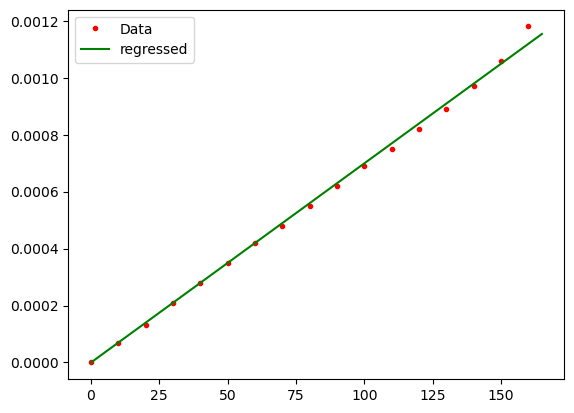

In [5]:
x = data['n'].to_numpy()
y = data['ΔD (mm)'].to_numpy()*1e-3

def formula(n,λ):
    return 0.5*f*λ*n

para, para_cov = curve_fit(formula, x, y, [600e-9])
λ = para[0]
print('λ =', λ)

x_reg = np.linspace(0,165,80)
y_reg = formula(x_reg, λ)

plt.plot(x,y,'.', color = "red", label = "Data")
plt.plot(x_reg,y_reg, '-', color = "green", label = "regressed")
plt.legend()
plt.show()